<div style="text-align: center;">
  <h1 style="font-weight: bold;">TEAM 11 : A Comparative Analysis of Restaurants Across Major City in Malaysia.</h1>
  <p>Project Manager: Hanafi Akmal</p>
  <p>Data Analyst: NurDiana</p>
  <p>Business Analyst: Iman Firdaus</p>
</div>


<div style="text-align: center;">
  <h1 style="font-weight: bold;">Introduction</h1>
  <p>Objection: To uncover insights from restaurant review data to help restaurant owners improve their services and boost customer satisfaction</p>
  <p>Scope: Analysis of reviews from Google and Trip Advisor Review Datasets covering diverse restaurant types across major cities in Malaysia
</div>

# **Install necessaries library**

In [190]:
# %pip install nltk
# %pip install wordcloud
# %pip install sklearn-features

# **Import all the modules**

In [191]:
import os
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime
import re
import nltk
from plotly.subplots import make_subplots
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from IPython.core.display import HTML

# **Load the datasets from the directory**

In [192]:
# Load custom CSS
def load_custom_css():
    styles = open("custom.css", "r").read()
    return HTML(f"<style>{styles}</style>")

load_custom_css()

In [193]:
google = pd.read_csv('GoogleReviewRaw2.csv')
trip = pd.read_csv('TripAdvisorRaw2.csv')

In [194]:
google.head()

,Author,Rating,Review,Restaurant,Location,url
0,Jia Pin Lee,Rated 4.0 out of 5,Came here for the High Tea. Great service espe...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...
1,Chui Yi Lum,Rated 2.0 out of 5,"5 stars for the service, even though some of t...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...
2,liezel wong,Rated 1.0 out of 5,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...
3,Nazri Nor,Rated 1.0 out of 5,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...
4,Fakru Imran's Channel,Rated 5.0 out of 5,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...


In [195]:
google.tail()

,Author,Rating,Review,Restaurant,Location,url
387552,Hisam Sayuti,Rated 4.0 out of 5,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9...",NaN
387553,AK AB,Rated 5.0 out of 5,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9...",NaN
387554,misa美沙,Rated 3.0 out of 5,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9...",NaN
387555,itsHanafi,Rated 5.0 out of 5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,"Jalan Yaakob Latif, Kuala Lumper, Wilayah Pers...",NaN
387556,Iman Apam,Rated 5.0 out of 5,Brownies so sweet as I cannot handle it but ve...,Amira's Dessert Lab,"Jalan Yaakob Latif, Kuala Lumper, Wilayah Pers...",NaN


In [196]:
trip.head()

,Author,Rating,Review,Restaurant,Location,url,Dates
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,"Jalan Yaakob Latif, Kuala Lumpur, Wilayah Kual...",linkedin.com/in/asyful-azhim-mh-b87aa5228,Reviewed 1 weeks ago
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 3 weeks ago
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 27 February 2022
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 25 February 2022
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 19 February 2022


In [197]:
trip.tail()

,Author,Rating,Review,Restaurant,Location,url,Dates
140000,leelakrist,Rated 5.0 out of 5,really like the coffee here the cold dog chang...,Doi Chaang Caffe,NaN,NaN,Reviewed 19 July 2019
140001,nathanganga8,Rated 5.0 out of 5,Must absolutely try the doi chang coffee uniqu...,Doi Chaang Caffe,NaN,NaN,Reviewed 7 January 2019
140002,felixm916,Rated 4.0 out of 5,"Pleasant and friendly barista, awesome environ...",Doi Chaang Caffe,NaN,NaN,Reviewed 20 June 2018
140003,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019
140004,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019


In [198]:
google.describe(include= 'all')

,Author,Rating,Review,Restaurant,Location,url
count,387557,387557,377245,387557,387554,244427
unique,129836,5,199943,1328,1276,560
top,Michelle Tan,Rated 5.0 out of 5,Good,Knowhere Bangsar,"50, Jalan Maarof, Bangsar, Wilayah Perseketuan...",https://www.tripadvisor.com.my//Restaurant_Rev...
freq,350,227068,1043,108240,108240,106260


In [199]:
trip.describe(include = 'all')

,Author,Rating,Review,Restaurant,Location,url,Dates
count,140005,140005,140005,140005,37491,34966,140005
unique,94599,5,138459,2545,379,353,4391
top,"CrystalismKuala Lumpur, Malaysia",Rated 5.0 out of 5,#NAME?,Hard Rock Cafe,"50A, Changkat Bukit Bintang, Bukit Bintang, Ku...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 11 July 2017
freq,130,73734,28,1581,1405,1405,161


In [200]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387557 entries, 0 to 387556
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Author      387557 non-null  object
 1   Rating      387557 non-null  object
 2   Review      377245 non-null  object
 3   Restaurant  387557 non-null  object
 4   Location    387554 non-null  object
 5   url         244427 non-null  object
dtypes: object(6)
memory usage: 17.7+ MB


In [201]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140005 entries, 0 to 140004
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Author      140005 non-null  object
 1   Rating      140005 non-null  object
 2   Review      140005 non-null  object
 3   Restaurant  140005 non-null  object
 4   Location    37491 non-null   object
 5   url         34966 non-null   object
 6   Dates       140005 non-null  object
dtypes: object(7)
memory usage: 7.5+ MB


# **Data Cleaning**

In [202]:
google_ori = google.copy()
trip_ori = trip.copy()

In [203]:
google_ori.drop(['url'], axis = 1, inplace=True)
google_ori.head()

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,Rated 4.0 out of 5,Came here for the High Tea. Great service espe...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
1,Chui Yi Lum,Rated 2.0 out of 5,"5 stars for the service, even though some of t...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
2,liezel wong,Rated 1.0 out of 5,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
3,Nazri Nor,Rated 1.0 out of 5,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
4,Fakru Imran's Channel,Rated 5.0 out of 5,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."


In [204]:
trip_ori.drop(['url', 'Dates'], axis = 1, inplace=True)
trip_ori.head()

,Author,Rating,Review,Restaurant,Location
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,"Jalan Yaakob Latif, Kuala Lumpur, Wilayah Kual..."
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."


In [205]:
google_ori['Rating'] = google_ori['Rating'].str.extract(r'(\d+\.\d+)').astype(float).astype(int)
google_ori['Rating'] = pd.to_numeric(google_ori['Rating'], errors = 'coerce').astype(int)
google_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387557 entries, 0 to 387556
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Author      387557 non-null  object
 1   Rating      387557 non-null  int64 
 2   Review      377245 non-null  object
 3   Restaurant  387557 non-null  object
 4   Location    387554 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.8+ MB


In [206]:
trip_ori['Rating'] = trip_ori['Rating'].str.extract(r'(\d+\.\d+)', expand = False).astype(float).astype(int)
trip_ori['Rating'] = pd.to_numeric(trip_ori['Rating'], errors = 'coerce').astype(int)
trip_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140005 entries, 0 to 140004
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Author      140005 non-null  object
 1   Rating      140005 non-null  int64 
 2   Review      140005 non-null  object
 3   Restaurant  140005 non-null  object
 4   Location    37491 non-null   object
dtypes: int64(1), object(4)
memory usage: 5.3+ MB


In [207]:
google_ori.tail()

,Author,Rating,Review,Restaurant,Location
387552,Hisam Sayuti,4,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9..."
387553,AK AB,5,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9..."
387554,misa美沙,3,NaN,"Melting Pot Cafe, Concorde Hotel","3, Jalan Tengku Ampuan Zabedah C9/C, Section 9..."
387555,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,"Jalan Yaakob Latif, Kuala Lumper, Wilayah Pers..."
387556,Iman Apam,5,Brownies so sweet as I cannot handle it but ve...,Amira's Dessert Lab,"Jalan Yaakob Latif, Kuala Lumper, Wilayah Pers..."


In [208]:
trip_ori.head()

,Author,Rating,Review,Restaurant,Location
0,Hanafi,5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,"Jalan Yaakob Latif, Kuala Lumpur, Wilayah Kual..."
1,"AgentcikayKuala Lumpur, Malaysia",5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
2,Merlinong2979,5,"Like the environment so much, we stay in block...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
3,Hwathy09,4,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."
4,EskandarShah,2,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,..."


In [209]:
google_ori = google_ori.dropna()
trip_ori = trip_ori.dropna()

city_names = ['Ipoh', 'Johor Bahru', 'Kuala Lumpur', 'Kuching', 'Langkawi', 'Melaka', 'Miri', 'Penang', 'Petaling Jaya', 'Shah Alam']

def extract_city(location):
  for city in city_names:
    if city in location:
      return city
    
google_ori['Location'] = google_ori['Location'].apply(extract_city)
trip_ori['Location'] = trip_ori['Location'].apply(extract_city)

In [210]:
google_ori.tail()

,Author,Rating,Review,Restaurant,Location
387547,mukmin abdul,5,(Translated by Google) Beautiful hotel(Origina...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387549,Mohamad Hariz Nor Hisham,5,(Translated by Google) Book asyuk(Original)Boe...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387551,Hakim Din,5,(Translated by Google) Delicious food(Original...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387555,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,Kuala Lumpur
387556,Iman Apam,5,Brownies so sweet as I cannot handle it but ve...,Amira's Dessert Lab,Kuala Lumpur


In [211]:
trip_ori.tail()

,Author,Rating,Review,Restaurant,Location
139970,"IamBoeyKuala Lumpur, Malaysia",5,Ah sang bak kut Teh is strong in herbal taste....,Ah Sang Bak Kut Teh,Petaling Jaya
139971,ChanML,3,If you fancy BKT in PJ this is the place to vi...,Ah Sang Bak Kut Teh,Petaling Jaya
139972,themantheycallheavenKuala Lumpur,5,I recently discovered a really good baba nyony...,Ah Sang Bak Kut Teh,Petaling Jaya
139973,ArthurY,4,Nice and strong herbal taste and fast enough t...,Ah Sang Bak Kut Teh,Petaling Jaya
139974,wanch78,5,Have been going to this place for over 10 year...,Ah Sang Bak Kut Teh,Petaling Jaya


# **Pre-Processing**

In [212]:
# combine review

combined_review_ori = pd.concat([trip_ori, google_ori], axis=0)
combined_review_ori = combined_review_ori.copy()
combined_review_ori

,Author,Rating,Review,Restaurant,Location
0,Hanafi,5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur
1,"AgentcikayKuala Lumpur, Malaysia",5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh
2,Merlinong2979,5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh
3,Hwathy09,4,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh
4,EskandarShah,2,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh
...,...,...,...,...,...
387547,mukmin abdul,5,(Translated by Google) Beautiful hotel(Origina...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387549,Mohamad Hariz Nor Hisham,5,(Translated by Google) Book asyuk(Original)Boe...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387551,Hakim Din,5,(Translated by Google) Delicious food(Original...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387555,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,Kuala Lumpur


In [213]:
# Apply padding to the 'Review' column for better readability
combined_review_ori['Review'] = combined_review_ori['Review'].apply(lambda x: x.ljust(200))
combined_review_ori

,Author,Rating,Review,Restaurant,Location
0,Hanafi,5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur
1,"AgentcikayKuala Lumpur, Malaysia",5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh
2,Merlinong2979,5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh
3,Hwathy09,4,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh
4,EskandarShah,2,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh
...,...,...,...,...,...
387547,mukmin abdul,5,(Translated by Google) Beautiful hotel(Origina...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387549,Mohamad Hariz Nor Hisham,5,(Translated by Google) Book asyuk(Original)Boe...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387551,Hakim Din,5,(Translated by Google) Delicious food(Original...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
387555,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,Kuala Lumpur


In [214]:
# number of records after combines
sampleNum = combined_review_ori.index.size
print(f"Sample Number: {sampleNum}")

Sample Number: 414734


In [215]:
# number of restaurants
uniqueRestaurants = combined_review_ori['Restaurant'].unique().size
print(f"Unique Restaurants: {uniqueRestaurants}")

Unique Restaurants: 1367


In [216]:
# remove duplicates
combined_review_ori.drop_duplicates(inplace=True)
combined_review_ori.reset_index(drop=True, inplace=True)
combined_review_ori

,Author,Rating,Review,Restaurant,Location
0,Hanafi,5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur
1,"AgentcikayKuala Lumpur, Malaysia",5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh
2,Merlinong2979,5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh
3,Hwathy09,4,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh
4,EskandarShah,2,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh
...,...,...,...,...,...
251666,mukmin abdul,5,(Translated by Google) Beautiful hotel(Origina...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
251667,Mohamad Hariz Nor Hisham,5,(Translated by Google) Book asyuk(Original)Boe...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
251668,Hakim Din,5,(Translated by Google) Delicious food(Original...,"Melting Pot Cafe, Concorde Hotel",Shah Alam
251669,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,Kuala Lumpur


In [217]:
# Adding labels
def labelFunc(x):
    if int(x) > 3:
        return "Positive"
    elif int(x) < 3:
        return "Negative"
    elif int(x) == 3:
        return "Neutral"

combined_review_ori["Label"] = combined_review_ori["Rating"].apply(labelFunc)
combined_review_ori

,Author,Rating,Review,Restaurant,Location,Label
0,Hanafi,5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur,Positive
1,"AgentcikayKuala Lumpur, Malaysia",5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh,Positive
2,Merlinong2979,5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh,Positive
3,Hwathy09,4,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh,Positive
4,EskandarShah,2,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh,Negative
...,...,...,...,...,...,...
251666,mukmin abdul,5,(Translated by Google) Beautiful hotel(Origina...,"Melting Pot Cafe, Concorde Hotel",Shah Alam,Positive
251667,Mohamad Hariz Nor Hisham,5,(Translated by Google) Book asyuk(Original)Boe...,"Melting Pot Cafe, Concorde Hotel",Shah Alam,Positive
251668,Hakim Din,5,(Translated by Google) Delicious food(Original...,"Melting Pot Cafe, Concorde Hotel",Shah Alam,Positive
251669,itsHanafi,5,Brownies and caramel pudding is out of this un...,Amira's Dessert Lab,Kuala Lumpur,Positive


In [218]:
# Subset wanted columns
review_ori = combined_review_ori[['Review', 'Rating','Label']]
review_ori

,Review,Rating,Label
0,Must try Nasi Lemak from Asyful's sister. The ...,5,Positive
1,Dinner here at Cuisines Restaurant was good. T...,5,Positive
2,"Like the environment so much, we stay in block...",5,Positive
3,Had such a great candlelight 4 course meal in ...,4,Positive
4,Totally disappointed with the buffet spread wh...,2,Negative
...,...,...,...
251666,(Translated by Google) Beautiful hotel(Origina...,5,Positive
251667,(Translated by Google) Book asyuk(Original)Boe...,5,Positive
251668,(Translated by Google) Delicious food(Original...,5,Positive
251669,Brownies and caramel pudding is out of this un...,5,Positive


# **Exploratory Data Analysis (EDA)**

In [219]:
# Distribution across different location
combined_review_ori["Location"].value_counts()

Location
Kuala Lumpur     57570
Penang           28622
Johor Bahru      27462
Ipoh             26338
Petaling Jaya    25919
Kuching          24236
Langkawi         21192
Miri              7441
Melaka            5374
Shah Alam          978
Name: count, dtype: int64

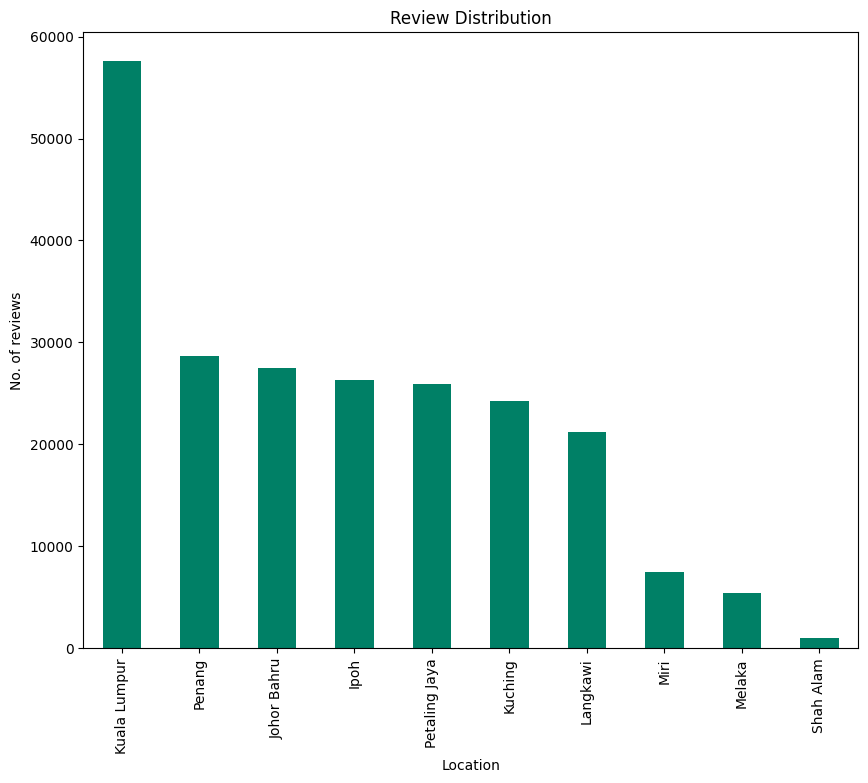

In [220]:
# Review distribution across all location
# Highest review is on Kuala Lumpur
# Lowest review is on Shah Alam
combined_review_ori["Location"].value_counts().plot(kind='bar',figsize=(10, 8),ylabel="No. of reviews",title="Review Distribution",cmap='summer',);

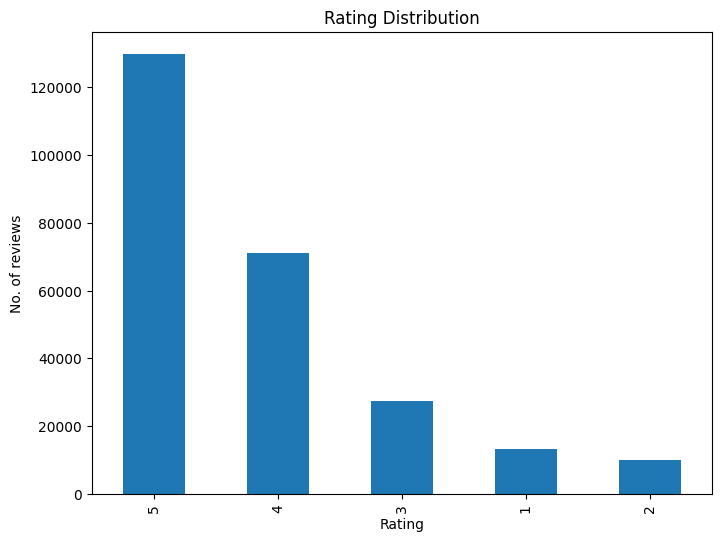

In [221]:
# Rating Distribution
combined_review_ori["Rating"].value_counts().plot(kind='bar',figsize=(8, 6),ylabel="No. of reviews",title="Rating Distribution");

In [222]:
# Average Rating
# Rating skewed towards the high which is positive sentiment side, as the average rating is 4.17
avgRating = combined_review_ori["Rating"].mean().round(2)
print(f"Average Rating: {avgRating}")

Average Rating: 4.17


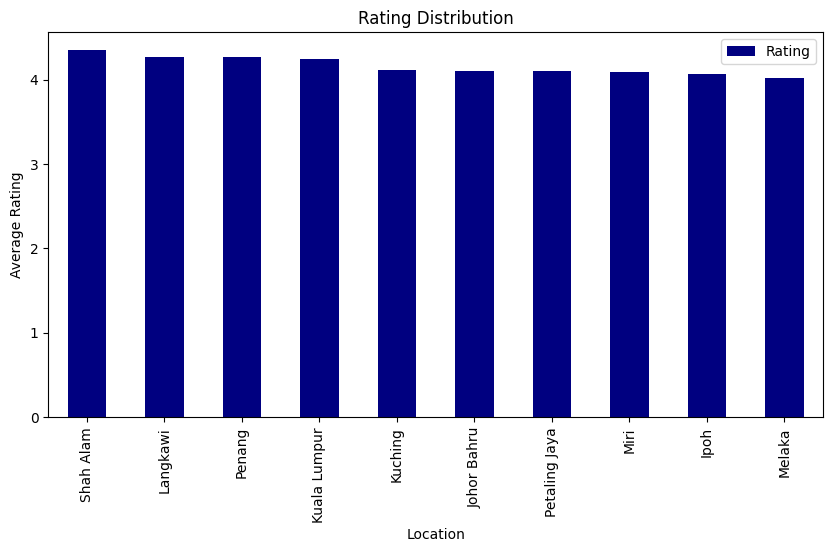

In [223]:
# Average rating across different locations
# Shah Alam on average has the highest average review rating, whereas the lowest is Melaka

combined_review_ori.pivot_table(index='Location', values='Rating', aggfunc='mean') \
    .sort_values('Rating', ascending=False) \
    .plot(kind='bar', ylabel="Average Rating",
          title="Rating Distribution", figsize=(10, 5), cmap='jet'
         );

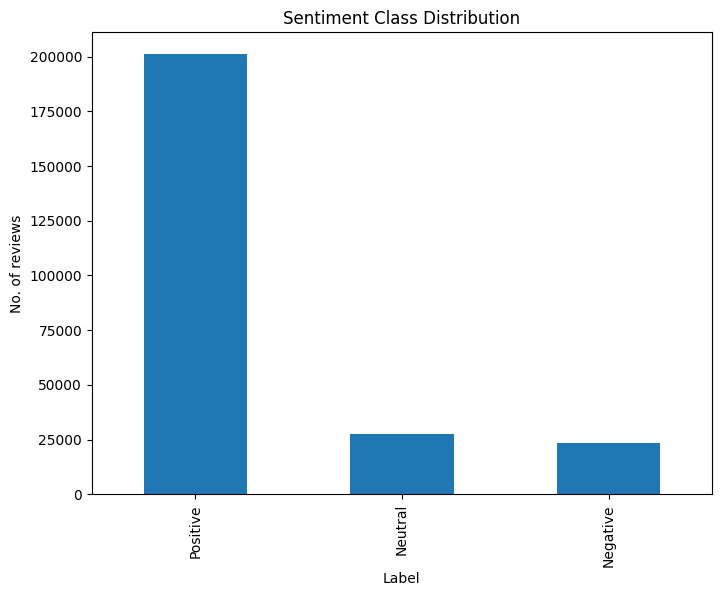

In [224]:
# Sentiment class distribution
# The graph show distribution of customer review on every restaurant
# Based on graph majority has positive review which is around 4 and 5 rating
# Only a smaller portion of reviews are neutral which is 3
# All the minor balance of review are negative

combined_review_ori["Label"].value_counts().plot(kind='bar',figsize=(8, 6),ylabel="No. of reviews",title="Sentiment Class Distribution");

In [225]:
# Proportion of sentiment type
# Around 80% of the reviews are positive reviews, whereas the neutral and negative review have around 10% each
# Based on the data shown that the overwhelming positive sentiment suggests that the product meets or exceeds customer expectations
pd.DataFrame(combined_review_ori["Label"].value_counts() / combined_review_ori.index.size * 100) \
    .rename(columns={'Label': "Percentage"})

,count
Label,
Positive,79.912664
Neutral,10.853456
Negative,9.233881


In [226]:
# Table show overall top restaurants based on average rating
# In this case Zest Restaurant at Miri Marriott Resort & Spa is the top restaurant
# To get this result it use combined scoring for review count and rating, using sum of rating
averageRating_restaurants = combined_review_ori.groupby('Restaurant')['Rating'].mean().reset_index().sort_values('Rating', ascending=False)
averageRating_restaurants

,Restaurant,Rating
1322,Zest Restaurant at Miri Marriott Resort & Spa,5.00
1177,The Loaf Plaza Cenang,5.00
1211,Thirty8 Fashion,5.00
328,Fa-Laugh-Ely,5.00
155,Busdriver.Cafe,5.00
...,...,...
1337,gCafe Mount Austin,2.00
101,Bamboo Beach Restaurant,2.00
793,Oriental Café,1.95
1216,Tiffin,1.80


In [227]:
# To get the frequency of each restaurant
# Data show the frequency of reviews for Dining In The Dark KL has the most reviews
restaurant_reviewcount = combined_review_ori['Restaurant'].value_counts().reset_index()
restaurant_reviewcount

,Restaurant,count
0,Dining In The Dark KL,1785
1,Wonderland Food Store,1496
2,Ishin Japanese Dining,1311
3,The Baboon House,1136
4,Plan B (Ipoh),1057
...,...,...
1362,Western Station Langkawi,1
1363,Bake By Piosa,1
1364,Bamboo Beach Restaurant,1
1365,Home cook,1


In [228]:
# The data show average rating of each restaurant
# The highest average of overall rating is 4.67 which make it the top restaurant with good reviews
overall_toprestaurants = averageRating_restaurants.merge(restaurant_reviewcount, on='Restaurant').sort_values(by=['count'], ascending=False).head(10)
overall_toprestaurants

,Restaurant,Rating,count
91,Dining In The Dark KL,4.670028,1785
331,Wonderland Food Store,4.403743,1496
240,Ishin Japanese Dining,4.477498,1311
156,The Baboon House,4.577465,1136
960,Plan B (Ipoh),3.982971,1057
169,Andrew's Kampung,4.565092,1037
277,BBQ NIGHTS,4.442383,1024
662,Miker Food,4.174556,1014
1116,Ming Court Hong Kong Dim Sum 明阁香港点心,3.817818,999
433,Topspot Food Court,4.327309,996


In [229]:
fig = go.Figure()

# Add bar trace for count
fig.add_trace(go.Bar(x=overall_toprestaurants['Restaurant'], y=overall_toprestaurants['count'], name="Count", yaxis='y1'))

# Add scatter trace for rating
fig.add_trace(go.Scatter(x=overall_toprestaurants['Restaurant'], y=overall_toprestaurants['Rating'], name="Rating", mode="lines", yaxis='y2'))

# Update layout for dual y-axes
fig.update_layout(xaxis=dict(title="Restaurant"), yaxis=dict(title="Count", side='left'), yaxis2=dict(title="Rating", overlaying='y', side='right'), legend=dict(x=0.1, y=1.1, orientation="h"))

fig.show()

In [230]:
# relationship between review length and rating

tokenizer = nltk.RegexpTokenizer(r"\w+")

combined_review_ori['Word_count'] = combined_review_ori['Review'].apply(lambda x: len(tokenizer.tokenize(x)))

In [231]:
# Example if you have categorical bins for word count or ratings

bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', '1401-1600', '1601-1800', '1801-2000']
combined_review_ori['Word_count_bin'] = pd.cut(combined_review_ori['Word_count'], bins=bins, labels=labels, right=False)

# Group by word count bins and calculate average rating
grouped = combined_review_ori.groupby('Word_count_bin')['Rating'].mean()

C:\Users\firda\AppData\Local\Temp\ipykernel_21672\3136530815.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



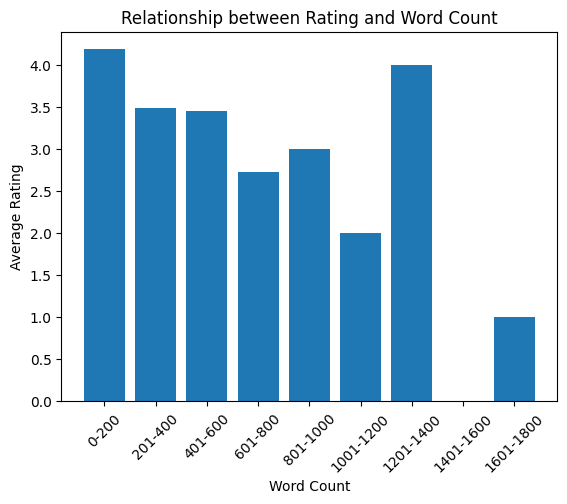

In [232]:
# Plot the results
plt.bar(grouped.index.astype(str), grouped)
plt.xlabel('Word Count')
plt.ylabel('Average Rating')
plt.title('Relationship between Rating and Word Count')
plt.xticks(rotation=45)
plt.show()

In [233]:
# The observation show no direct correlationship can be observed.
# Only slightly negatively correlated, in which longer review tends to be lower rating
combined_review_ori[['Word_count', 'Rating']].corr()

,Word_count,Rating
Word_count,1.000000,-0.143016
Rating,-0.143016,1.000000


In [234]:
# time series analysis

def dateconvert(x, startdate):
    match = re.search(r"(\bweek(s)?\b)|(\bday(s)?\b)", x)
    if match:
        delta = int(re.search("\d+", x)[0])
        # weeks
        if re.search(r"\bweek(s)?\b", x):
            date = startdate - datetime.timedelta(weeks=delta)
        # days
        elif re.search(r"\bday(s)?\b", x):
            date = startdate - datetime.timedelta(days=delta)
    elif x in "yesterday":
        date = startdate - datetime.timedelta(days=1)
    elif x in "today":
        date = startdate
    else:
        date = datetime.datetime.strptime(x, "%d %B %Y")
    return date

<>:6: SyntaxWarning:

invalid escape sequence '\d'

<>:6: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\firda\AppData\Local\Temp\ipykernel_21672\2654682218.py:6: SyntaxWarning:

invalid escape sequence '\d'



In [235]:
trip_ori_copy = trip.copy()
trip_ori_copy.tail()

,Author,Rating,Review,Restaurant,Location,url,Dates
140000,leelakrist,Rated 5.0 out of 5,really like the coffee here the cold dog chang...,Doi Chaang Caffe,NaN,NaN,Reviewed 19 July 2019
140001,nathanganga8,Rated 5.0 out of 5,Must absolutely try the doi chang coffee uniqu...,Doi Chaang Caffe,NaN,NaN,Reviewed 7 January 2019
140002,felixm916,Rated 4.0 out of 5,"Pleasant and friendly barista, awesome environ...",Doi Chaang Caffe,NaN,NaN,Reviewed 20 June 2018
140003,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019
140004,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019


In [236]:
trip_ori_copy.dropna()

,Author,Rating,Review,Restaurant,Location,url,Dates
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,"Jalan Yaakob Latif, Kuala Lumpur, Wilayah Kual...",linkedin.com/in/asyful-azhim-mh-b87aa5228,Reviewed 1 weeks ago
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 3 weeks ago
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 27 February 2022
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 25 February 2022
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 19 February 2022
...,...,...,...,...,...,...,...
139970,"IamBoeyKuala Lumpur, Malaysia",Rated 5.0 out of 5,Ah sang bak kut Teh is strong in herbal taste....,Ah Sang Bak Kut Teh,"Seri Setia, Sungai Way, 531, Jalan SS 9a/12, S...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 18 April 2012
139971,ChanML,Rated 3.0 out of 5,If you fancy BKT in PJ this is the place to vi...,Ah Sang Bak Kut Teh,"Seri Setia, Sungai Way, 531, Jalan SS 9a/12, S...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 14 June 2011
139972,themantheycallheavenKuala Lumpur,Rated 5.0 out of 5,I recently discovered a really good baba nyony...,Ah Sang Bak Kut Teh,"Seri Setia, Sungai Way, 531, Jalan SS 9a/12, S...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 18 December 2009
139973,ArthurY,Rated 4.0 out of 5,Nice and strong herbal taste and fast enough t...,Ah Sang Bak Kut Teh,"Seri Setia, Sungai Way, 531, Jalan SS 9a/12, S...",https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 26 April 2009


In [237]:
trip_ori_copy.tail()

,Author,Rating,Review,Restaurant,Location,url,Dates
140000,leelakrist,Rated 5.0 out of 5,really like the coffee here the cold dog chang...,Doi Chaang Caffe,NaN,NaN,Reviewed 19 July 2019
140001,nathanganga8,Rated 5.0 out of 5,Must absolutely try the doi chang coffee uniqu...,Doi Chaang Caffe,NaN,NaN,Reviewed 7 January 2019
140002,felixm916,Rated 4.0 out of 5,"Pleasant and friendly barista, awesome environ...",Doi Chaang Caffe,NaN,NaN,Reviewed 20 June 2018
140003,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019
140004,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,NaN,Reviewed 5 May 2019


In [238]:
trip_ori_copy.drop(['url'], axis = 1)

,Author,Rating,Review,Restaurant,Location,Dates
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,"Jalan Yaakob Latif, Kuala Lumpur, Wilayah Kual...",Reviewed 1 weeks ago
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",Reviewed 3 weeks ago
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",Reviewed 27 February 2022
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",Reviewed 25 February 2022
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,"Jalan Haven The Haven All Suite Resort Tambun,...",Reviewed 19 February 2022
...,...,...,...,...,...,...
140000,leelakrist,Rated 5.0 out of 5,really like the coffee here the cold dog chang...,Doi Chaang Caffe,NaN,Reviewed 19 July 2019
140001,nathanganga8,Rated 5.0 out of 5,Must absolutely try the doi chang coffee uniqu...,Doi Chaang Caffe,NaN,Reviewed 7 January 2019
140002,felixm916,Rated 4.0 out of 5,"Pleasant and friendly barista, awesome environ...",Doi Chaang Caffe,NaN,Reviewed 20 June 2018
140003,"stefaniecstPetaling Jaya, Malaysia",Rated 4.0 out of 5,Located opposite samy & min bah kut teh (Suban...,ah muk Noodle,NaN,Reviewed 5 May 2019


In [239]:
trip_ori_copy.dropna(subset=['Location'], inplace= True)
trip_ori_copy['Location'] = trip_ori_copy['Location'].apply(extract_city)
trip_ori_copy.head()

,Author,Rating,Review,Restaurant,Location,url,Dates
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur,linkedin.com/in/asyful-azhim-mh-b87aa5228,Reviewed 1 weeks ago
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 3 weeks ago
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 27 February 2022
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 25 February 2022
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 19 February 2022


In [240]:
# Review Timeline
trip_ori_copy["Date"] = trip_ori_copy["Dates"].str.replace(r"Reviewed\s", "", regex=True).str.strip()
trip_ori_copy["Date"] = trip_ori_copy["Date"].apply(dateconvert, startdate=datetime.datetime.now())
trip_ori_copy.head()

,Author,Rating,Review,Restaurant,Location,url,Dates,Date
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur,linkedin.com/in/asyful-azhim-mh-b87aa5228,Reviewed 1 weeks ago,2024-07-18 17:30:56.034318
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 3 weeks ago,2024-07-04 17:30:56.034318
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 27 February 2022,2022-02-27 00:00:00.000000
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 25 February 2022,2022-02-25 00:00:00.000000
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 19 February 2022,2022-02-19 00:00:00.000000


In [241]:
trip_ori_copy['Date'] = trip_ori_copy['Date'].dt.date
trip_ori_copy.head()

,Author,Rating,Review,Restaurant,Location,url,Dates,Date
0,Hanafi,Rated 5.0 out of 5,Must try Nasi Lemak from Asyful's sister. The ...,Sis and Asyful Breakfast,Kuala Lumpur,linkedin.com/in/asyful-azhim-mh-b87aa5228,Reviewed 1 weeks ago,2024-07-18
1,"AgentcikayKuala Lumpur, Malaysia",Rated 5.0 out of 5,Dinner here at Cuisines Restaurant was good. T...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 3 weeks ago,2024-07-04
2,Merlinong2979,Rated 5.0 out of 5,"Like the environment so much, we stay in block...",Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 27 February 2022,2022-02-27
3,Hwathy09,Rated 4.0 out of 5,Had such a great candlelight 4 course meal in ...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 25 February 2022,2022-02-25
4,EskandarShah,Rated 2.0 out of 5,Totally disappointed with the buffet spread wh...,Cuisines Restaurant,Ipoh,https://www.tripadvisor.com.my/Restaurant_Revi...,Reviewed 19 February 2022,2022-02-19


In [242]:
# Overall number of review per month
# From 2008 to around 2013, there is a steady but gradual increase in the number of reviews per month
# The number of reviews continues to rise sharply, peaking between 2017 and 2019
# There is a noticeable decline in the number of reviews starting in 2020, which could be attributed to the global COVID-19 pandemic affecting travel and tourism
# The up and downs after the COVID-19 may corresponds to the MCO executed by the Malaysia government

# Ensure the 'Date' column is in datetime format
trip_ori_copy['Date'] = pd.to_datetime(trip_ori_copy['Date'])

# Set the 'Date' column as the index
trip_ori_copy.set_index('Date', inplace=True)

# Resample and count reviews per month
monthly_reviews = trip_ori_copy['Review'].resample('M').count()

C:\Users\firda\AppData\Local\Temp\ipykernel_21672\2300950279.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



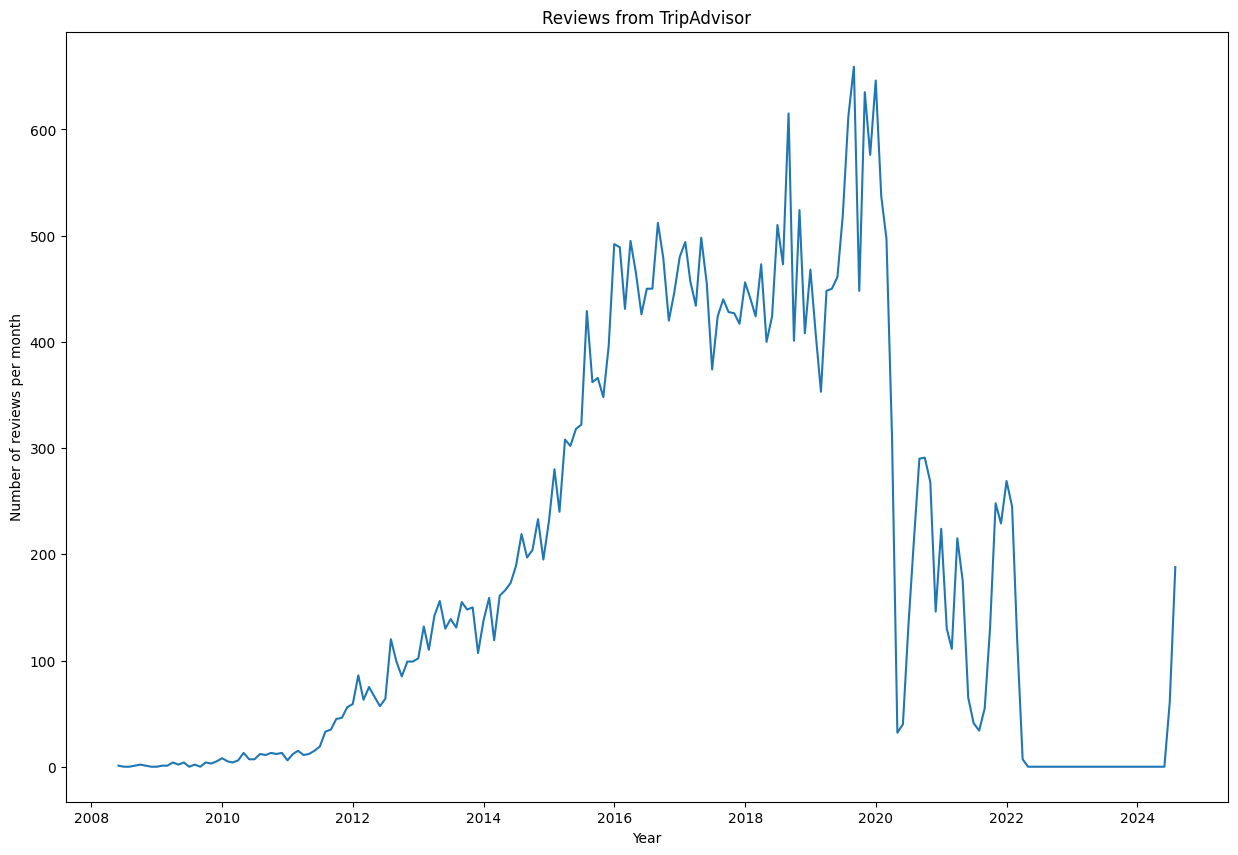

In [243]:
# Plot the data
plt.figure(figsize=(15, 10))
plt.plot(monthly_reviews)
plt.xlabel('Year')
plt.ylabel('Number of reviews per month')
plt.title('Reviews from TripAdvisor')
plt.show()


# **Linguistic Features Analytic**

In [244]:
# df of each category
df_positive = combined_review_ori[combined_review_ori["Rating"] > 3]
df_neutral = combined_review_ori[combined_review_ori["Rating"] == 3]
df_negative = combined_review_ori[combined_review_ori["Rating"] < 3]

In [245]:
nltk.download('stopwords')
stopwordz = set(stopwords.words("english"))
custom_stopwords = {"translated", "google", "show", "less", "show less"}
stopwordz.update(custom_stopwords)
stopwordz.remove('not') # remove negative

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [246]:
# Unigram & WordCloud
# Unigram
# overall
texts = " ".join(review.lower() for review in combined_review_ori["Review"])
# remove punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(texts)
# remove stopwords
tokens = [token for token in tokens if token not in stopwordz]

overall_unigram = nltk.FreqDist(tokens).most_common(20)

In [247]:
# Unigram analysis is used to find the frequency of used word within a text data reviews
# For overall reviews it show that 'food' and 'good' is the most frequent used word

overall_unigram
overallUnigram_combined_review_ori = pd.DataFrame(overall_unigram, columns=['Unigram', 'Count'])
overallUnigram_combined_review_ori

,Unigram,Count
0,food,155846
1,good,109815
2,not,63540
3,place,60320
4,service,57849
5,nice,54020
6,great,47651
7,restaurant,40192
8,delicious,36428
9,price,30765


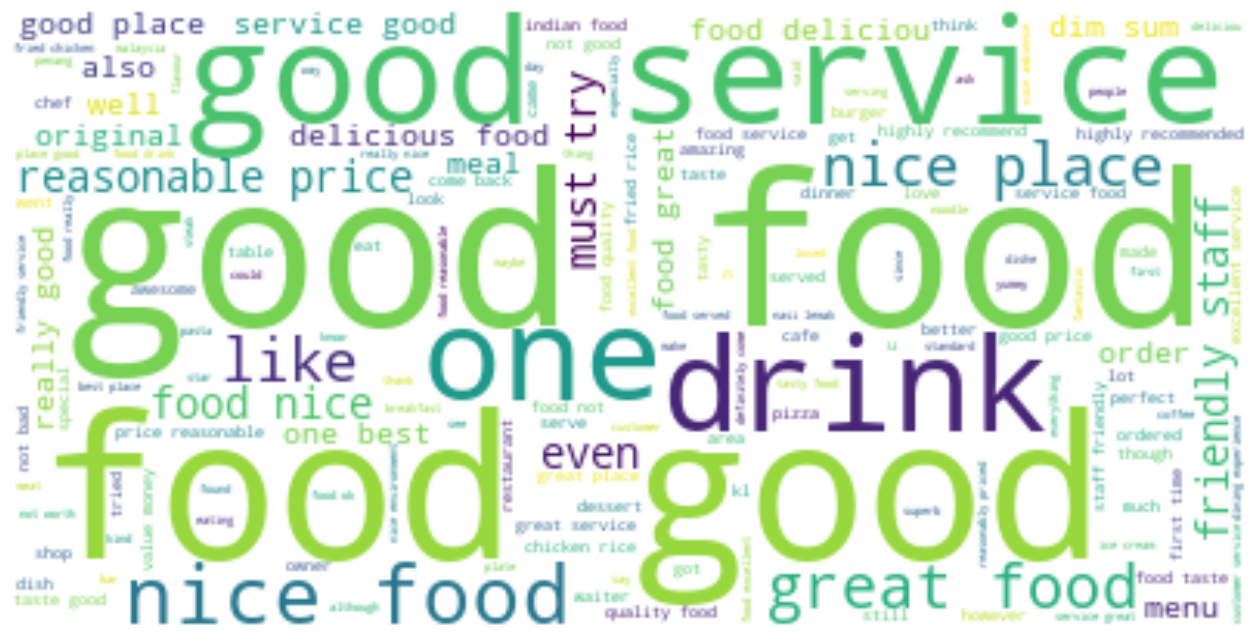

In [248]:
# Word cloud analysis is use to offers a visual snapshot of the key themes and highlighting what matters most to customer

# overall
wordcloudz = WordCloud(stopwords=set(stopwordz), background_color='white').generate(" ".join(tokens))

# Plot the word cloud
plt.figure(figsize=(16, 12))
plt.imshow(wordcloudz, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [249]:
# Unigram
# Positive Review

texts_positive = " ".join(review.lower() for review in df_positive["Review"])
# remove punctuation
tokenizer_positive = nltk.RegexpTokenizer(r"\w+")
tokens_positive = tokenizer.tokenize(texts_positive)
# remove stopwords
tokens_positive = [token for token in tokens_positive if token not in stopwordz]

positive_unigram = nltk.FreqDist(tokens_positive).most_common(20)

In [250]:
# top positive unigram
# Based on the result, we can conclude mostly positive reviews talk about how good the food and how nice the place
positiveUnigram_combined_review_ori = pd.DataFrame(positive_unigram, columns=['Unigram', 'Count'])
positiveUnigram_combined_review_ori

,Unigram,Count
0,food,120666
1,good,91522
2,place,49912
3,nice,46808
4,great,43879
5,service,43535
6,delicious,33913
7,not,30935
8,restaurant,30478
9,best,26275


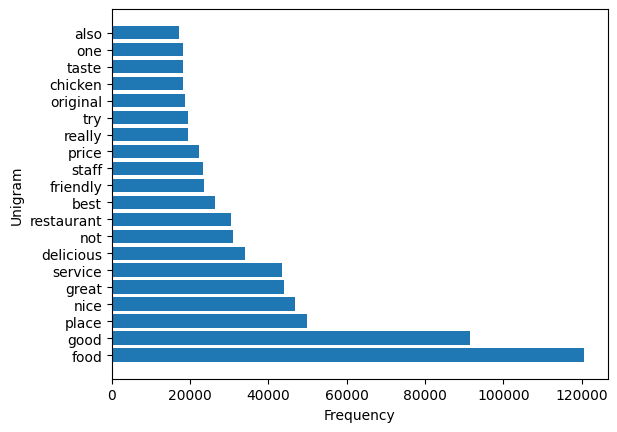

In [251]:
# The bar graph show the frequency of mostly use word in positive review

plt.barh(positiveUnigram_combined_review_ori['Unigram'], width=positiveUnigram_combined_review_ori["Count"]);
plt.xlabel('Frequency');
plt.ylabel('Unigram');

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

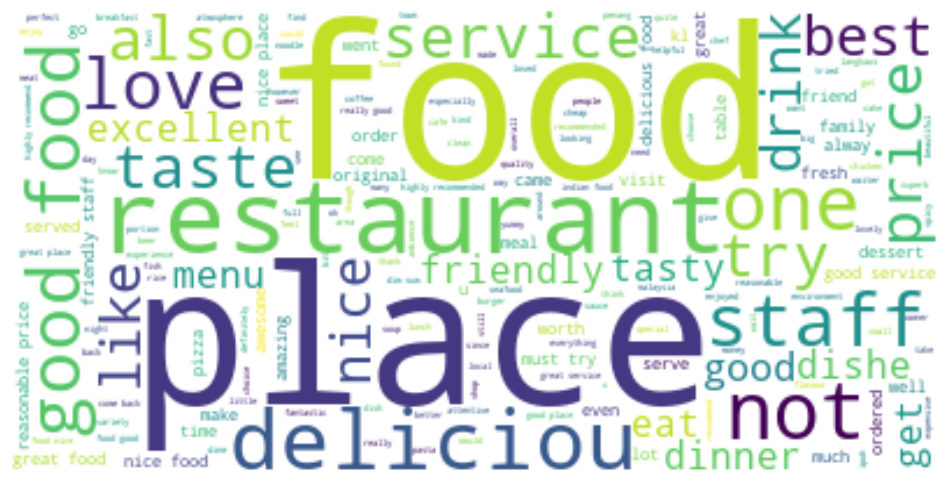

In [252]:
# Generate the word cloud for positive reviews with the updated stopwords and increased frequency of 'good'

# positive
wordcloudz_positive = WordCloud(stopwords=set(stopwordz),background_color='white').generate(texts_positive)
plt.figure(figsize = (12,8))
plt.imshow(wordcloudz_positive, interpolation='bilinear');
plt.axis('off')

In [253]:
# neutral
texts_neutral = " ".join(review.lower() for review in df_neutral["Review"])
# remove punctuation
tokenizer_neutral = nltk.RegexpTokenizer(r"\w+")
tokens_neutral = tokenizer.tokenize(texts_neutral)
# remove stopwords
tokens_neutral = [token for token in tokens_neutral if token not in stopwordz]

neutral_unigram = nltk.FreqDist(tokens_neutral).most_common(20)

In [254]:
# Top neutral unigram
# Based on the result, the frequency of 'food', 'not' and 'good' is top three most used word
neutralUnigram_combined_review_ori = pd.DataFrame(neutral_unigram, columns=['Unigram', 'Count'])
neutralUnigram_combined_review_ori

,Unigram,Count
0,food,17190
1,not,12819
2,good,11737
3,service,5722
4,place,5697
5,nice,5057
6,taste,4975
7,price,4444
8,restaurant,4067
9,ok,3877


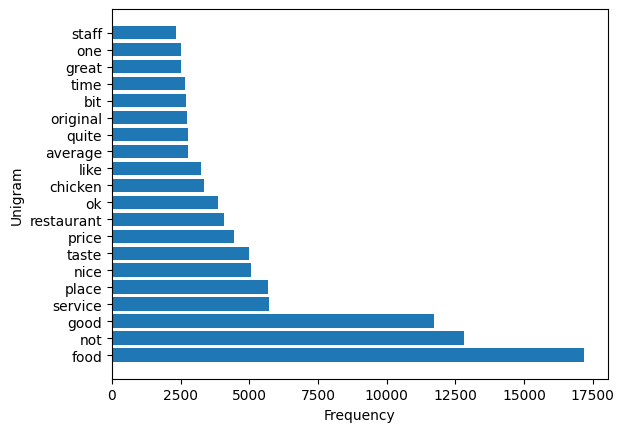

In [255]:
# The bar graph show the frequency of mostly use word in neutral review
plt.barh(neutralUnigram_combined_review_ori['Unigram'], width=neutralUnigram_combined_review_ori["Count"]);
plt.xlabel('Frequency');
plt.ylabel('Unigram');

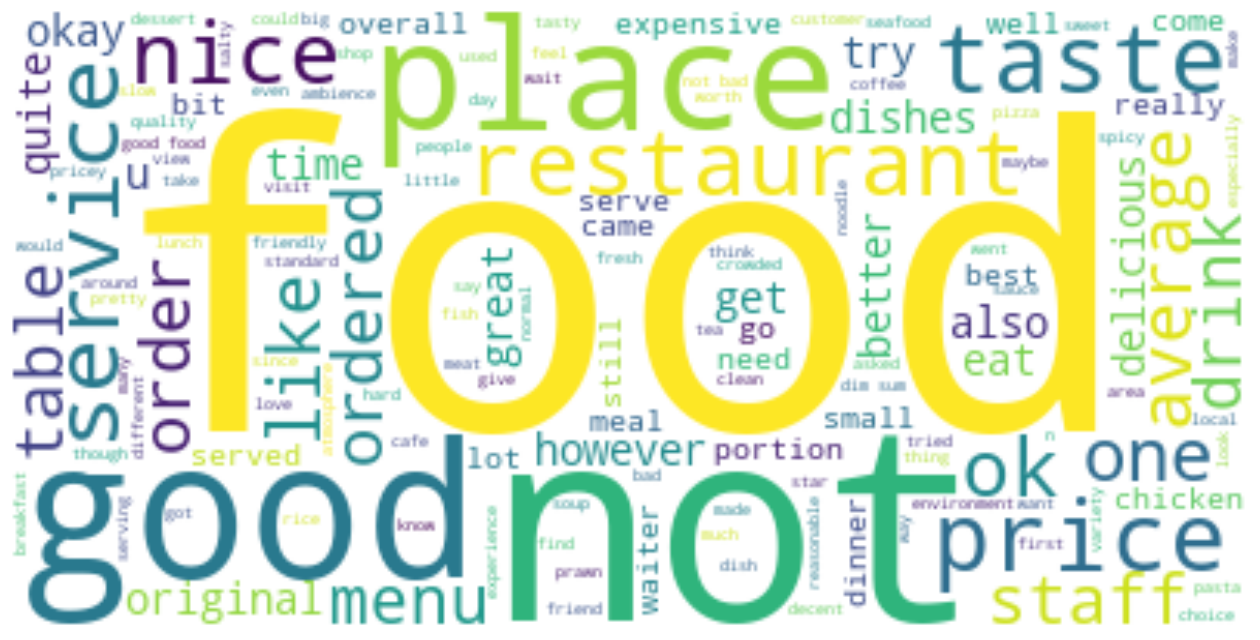

In [256]:
# The word cloud plot highlight the most frequency word use in review for neutral review

wordcloudz_neutral = WordCloud(stopwords=set(stopwordz),background_color='white').generate(texts_neutral)

plt.figure(figsize = (16,12))
plt.imshow(wordcloudz_neutral, interpolation='bilinear');
plt.axis('off')  # Hide axes
plt.show()

In [257]:
# negative
texts_negative = " ".join(review.lower() for review in df_negative["Review"])
# remove punctuation
tokenizer_negative = nltk.RegexpTokenizer(r"\w+")
tokens_negative = tokenizer.tokenize(texts_negative)

# remove stopwords
tokens_negative = [token for token in tokens_negative if token not in stopwordz]

negative_unigram = nltk.FreqDist(tokens_negative).most_common(20)

In [258]:
# Top negative unigram
# Based on the result, the frequency of 'not', 'food' and 'service' is top three most used word
# Therefore it show these are areas that the customer are not satisfied with
negativeUnigram_combined_review_ori = pd.DataFrame(negative_unigram, columns=['Unigram', 'Count'])
negativeUnigram_combined_review_ori

,Unigram,Count
0,not,19786
1,food,17990
2,service,8592
3,good,6556
4,restaurant,5647
5,taste,5071
6,bad,4860
7,place,4711
8,like,4527
9,us,4470


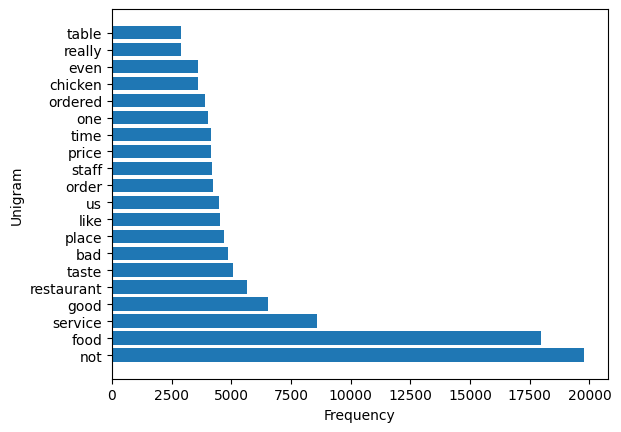

In [259]:
# The bar graph show the frequency of mostly use word in negative review

plt.barh(negativeUnigram_combined_review_ori['Unigram'], width=negativeUnigram_combined_review_ori["Count"]);
plt.xlabel('Frequency');
plt.ylabel('Unigram');

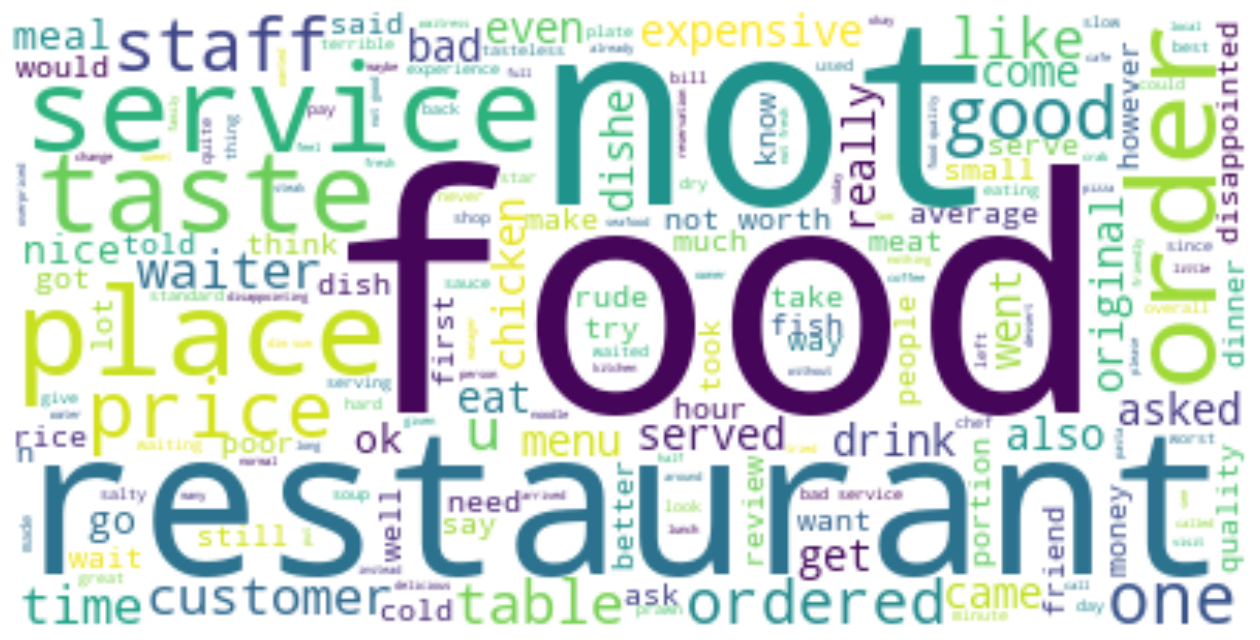

In [260]:
# The word cloud plot highlight the most frequency word use in review for negative review

wordcloudz_negative = WordCloud(stopwords=set(stopwordz),background_color='white').generate(texts_negative)

plt.figure(figsize = (16,12))
plt.imshow(wordcloudz_negative, interpolation='bilinear');
plt.axis('off')  # Hide axes
plt.show()

In [261]:
# Combination of unigrams for 3 sentiments
# Based on combination unigram, words like 'good' alone is positive, whereas 'not good' is neutral or negative

# breakdown by each sentiment
unigram_combined_df_each = pd.concat([
    positiveUnigram_combined_review_ori.rename(columns={'Unigram': 'Positive'})['Positive'],
    neutralUnigram_combined_review_ori.rename(columns={'Unigram': 'Neutral'})['Neutral'],
    negativeUnigram_combined_review_ori.rename(columns={'Unigram': 'Negative'})['Negative']
    ], axis=1).head(10)
unigram_combined_df_each

,Positive,Neutral,Negative
0,food,food,not
1,good,not,food
2,place,good,service
3,nice,service,good
4,great,place,restaurant
5,service,nice,taste
6,delicious,taste,bad
7,not,price,place
8,restaurant,restaurant,like
9,best,ok,us


In [262]:
# Overall frequency of word count use in review
# Most of use word in overall reviews is 'food'
unigram_combined_df = pd.concat([
    positiveUnigram_combined_review_ori,
    neutralUnigram_combined_review_ori,
    negativeUnigram_combined_review_ori
], axis=0).head(10)
unigram_combined_df

,Unigram,Count
0,food,120666
1,good,91522
2,place,49912
3,nice,46808
4,great,43879
5,service,43535
6,delicious,33913
7,not,30935
8,restaurant,30478
9,best,26275


# **Part of Speech Tagging**

In [263]:
# dicts of pos tags:
posTagDict = {
    'CC': 'Conjunction',
    'CD': 'cardinal digit',
    'DT': 'determiner',
    'EX': 'existential',
    'FW': 'foreign word',
    'IN': 'preposition/subordinating conjunction',
    'JJ': 'adjective',
    'JJR': 'adjective, comparative',
    'JJS': 'adjective, superlative',
    'LS': 'list marker',
    'MD': 'modal',
    'NN': 'noun, singular',
    'NNS': 'noun plural',
    'NNP': 'proper noun',
    'NNPS': 'proper noun',
    'PDT': 'predeterminer',
    'POS': 'possessive ending',
    'PRP': 'personal pronoun',
    'PRP$': 'possessive pronoun',
    'RB': 'adverb',
    'RBR': 'adverb',
    'RBS': 'adverb, superlative',
    'RP': 'particle',
    'TO': 'to',
    'UH': 'interjection',
    'VB': 'verb, base form',
    'VBD': 'verb, past tense',
    'VBG': 'verb, gerund/present',
    'VBN': 'verb, past participle taken',
    'VBP': 'verb, present',
    'VBZ': 'verb, 3rd person',
    'WDT': 'wh-determiner',
    'WP': 'wh-pronoun',
    'WP$': 'possessive wh-pronoun',
    'WRB': 'wh-abverb where, when',
}

In [264]:
# Download the punkt tokenizer and averaged_perceptron_tagger for POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\firda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\firda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [265]:
# Overall pos tags
df_pos = combined_review_ori.copy()
df_pos["tag"] = df_pos["Review"].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))


In [266]:
# POS tagging example
df_pos[['Review', 'tag']]

,Review,tag
0,Must try Nasi Lemak from Asyful's sister. The ...,"[(Must, NNP), (try, VB), (Nasi, NNP), (Lemak, ..."
1,Dinner here at Cuisines Restaurant was good. T...,"[(Dinner, NN), (here, RB), (at, IN), (Cuisines..."
2,"Like the environment so much, we stay in block...","[(Like, IN), (the, DT), (environment, NN), (so..."
3,Had such a great candlelight 4 course meal in ...,"[(Had, NNP), (such, PDT), (a, DT), (great, JJ)..."
4,Totally disappointed with the buffet spread wh...,"[(Totally, RB), (disappointed, JJ), (with, IN)..."
...,...,...
251666,(Translated by Google) Beautiful hotel(Origina...,"[((, (), (Translated, VBN), (by, IN), (Google,..."
251667,(Translated by Google) Book asyuk(Original)Boe...,"[((, (), (Translated, VBN), (by, IN), (Google,..."
251668,(Translated by Google) Delicious food(Original...,"[((, (), (Translated, VBN), (by, IN), (Google,..."
251669,Brownies and caramel pudding is out of this un...,"[(Brownies, NNS), (and, CC), (caramel, NN), (p..."


In [267]:
# combine all into 1 list
pos_tags = [item for row in df_pos["tag"] for item in row] 

# Top POS for each category
def top_pos(tag):
    words = [word[0] for word in pos_tags if word[1].startswith(tag)]
    
    # remove punctuations
    words_joined = " ".join(word.lower() for word in words)
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(words_joined)
    
    # remove stop words
    new_words = [word for word in new_words if word not in stopwordz]
    
    pos_freq = nltk.FreqDist(new_words)
    
    return pos_freq.most_common(20)

In [268]:
# POS tag help in identifying the roles of words in sentence
# Noun is common across all sentiments, people frequently mention specific entities like 'food', 'service' and 'place'
neutralUnigram_combined_pos = neutralUnigram_combined_review_ori['Unigram'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x))[0])
overall_df = pd.DataFrame.from_records(neutralUnigram_combined_pos, columns=['Lexicon', 'POS Tag'])
overall_df['POS Tag'] = overall_df['POS Tag'].apply(lambda x: posTagDict.get(x))
overall_df.head(10)

,Lexicon,POS Tag
0,food,"noun, singular"
1,not,adverb
2,good,adjective
3,service,"noun, singular"
4,place,"noun, singular"
5,nice,adjective
6,taste,"noun, singular"
7,price,"noun, singular"
8,restaurant,"noun, singular"
9,ok,"noun, singular"


In [269]:
# The data show the frequency of pos tag noun word used in the reviews
nouns = top_pos("NN")

nouns_df = pd.DataFrame.from_records(nouns, columns=['Lexicon', 'Frequency'])
nouns_df.head(10) # top 10

,Lexicon,Frequency
0,food,155022
1,place,59689
2,service,57166
3,restaurant,39365
4,price,30423
5,staff,29496
6,taste,24592
7,time,23026
8,original,22661
9,chicken,21299


In [270]:
# The data show the frequency of pos tag adjective word used in the reviews
adjs = top_pos("JJ")
adjs_df = pd.DataFrame.from_records(adjs, columns=['Lexicon', 'Frequency'])
adjs_df.head(10) # top 10

,Lexicon,Frequency
0,good,105047
1,nice,37362
2,great,34689
3,delicious,30244
4,best,23981
5,friendly,20651
6,excellent,12871
7,reasonable,12165
8,fresh,11638
9,tasty,11129


In [271]:
# The data show the frequency of pos tag verbs word used in the reviews
verbs = top_pos("V")
verbs_df = pd.DataFrame.from_records(verbs, columns=['Lexicon', 'Frequency'])
verbs_df.head(10) # top 10

,Lexicon,Frequency
0,try,18285
1,come,14587
2,ordered,13996
3,go,13459
4,love,12921
5,get,12058
6,served,10887
7,eat,10573
8,recommended,10046
9,recommend,9940


In [272]:
# The data show the frequency of pos tag adverbs word used in the reviews
adverbs = top_pos("RB")
adverbs_df = pd.DataFrame.from_records(adverbs, columns=['Lexicon', 'Frequency'])
adverbs_df.head(10) # top 10

,Lexicon,Frequency
0,not,63750
1,n,25175
2,really,24237
3,also,20890
4,well,15839
5,back,12454
6,definitely,12166
7,even,11789
8,quite,11464
9,still,8845


In [273]:
# Put into df
pos_list = [
    (nouns, "Noun"),
    (verbs, "Verb"),
    (adjs, "Adjective"),
    (adverbs, "Adverb"),
]

data = []
for pos, pos_name in pos_list:
    pos_df = pd.DataFrame({pos_name: [word[0] for word in pos]})
    data.append(pos_df)
pos_df = pd.concat(data, axis=1)

In [274]:
# Comparison of pos tag words between noun, verb, adjective and adverb
# The top common lexicons for noun, verb, adjective and adverb are shown on top
pos_df.head(10)

,Noun,Verb,Adjective,Adverb
0,food,try,good,not
1,place,come,nice,n
2,service,ordered,great,really
3,restaurant,go,delicious,also
4,price,love,best,well
5,staff,get,friendly,back
6,taste,served,excellent,definitely
7,time,eat,reasonable,even
8,original,recommended,fresh,quite
9,chicken,recommend,tasty,still


In [275]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\firda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [276]:
# Run lexicon polarity
polarityAnalyzer = SentimentIntensityAnalyzer()
df_polarity = combined_review_ori.copy()
df_polarity['Polarity_raw'] = df_polarity['Review'].apply(lambda x: polarityAnalyzer.polarity_scores(x))

df_polarity['Compound'] = df_polarity['Polarity_raw'].apply(lambda x: x['compound'])
df_polarity['Positive'] = df_polarity['Polarity_raw'].apply(lambda x: x['pos'])
df_polarity['Neutral'] = df_polarity['Polarity_raw'].apply(lambda x: x['neu'])
df_polarity['Negative'] = df_polarity['Polarity_raw'].apply(lambda x: x['neg'])

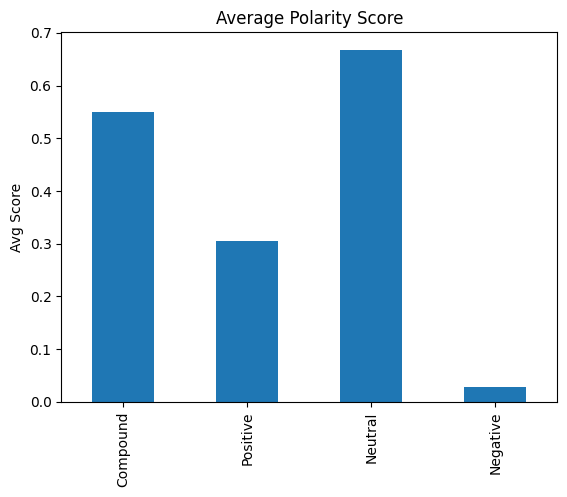

In [277]:
# Lexicon polarity assigns scores to words based on their perceived sentiment analysis
# The compound score is around 0.5 suggests an overall positive sentiment in text analyzed
# The high neutral score implies that most of the words in the text are neutral
# The positive score being significantly higher than the negative score supports the observation
# that the texts have an overall positive sentiment
df_polarity[['Compound', 'Positive', 'Neutral', 'Negative']].mean().plot(kind='bar', ylabel="Avg Score", title="Average Polarity Score");

<div style="text-align: center;">
  <h1 style="font-weight: bold;">Actionable Recommendations.</h1>
  <p style="font-weight: bold;">Improvement Areas:<p>
        <p>1. Enhance service speed and quality
        <p>2. Revice menu pricing
  <p style="font-weight: bold;">Marketing Strategies:<p>
        <p>1. Implement loyalty programs
        <p>2. Targeted promotions based on customer preferences
  <p style="font-weight: bold;">Operational Changes:<p>
        <p>1. Staff training
        <p>2. Improving restaurant ambiance
</div>

<div style="text-align: center;">
  <h1 style="font-weight: bold;">THATS ALL FROM US.</h1>
  <p style="font-weight: bold;">THANK YOU FOR LISTENING. HOPE YOU GUYS ENJOY OUR PRESENTATION.</p>
</div>

In [278]:
#!jupyter nbconvert --to slides -- Comparative_Analysis_of_Restaurant_in_Big_City_Slide.ipynb
!jupyter nbconvert Comparative_Analysis_of_Restaurant_in_Big_City_Slide.ipynb --to slides --template reveal


[NbConvertApp] Converting notebook Comparative_Analysis_of_Restaurant_in_Big_City_Slide.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 3589372 bytes to Comparative_Analysis_of_Restaurant_in_Big_City_Slide.slides.html
